In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler

import tensorflow as tf
from tensorflow import keras


In [14]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
data.drop('customerID',axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# Data type correction

In [17]:
data['TotalCharges'].values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [18]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [19]:
data['TotalCharges'].isnull().sum()

np.int64(11)

In [20]:
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

In [21]:
data['TotalCharges'].isnull().sum()

np.int64(0)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
tenure_churn_no =data[data.Churn=='No'].tenure
tenure_churn_yes =data[data.Churn=='yes'].tenure

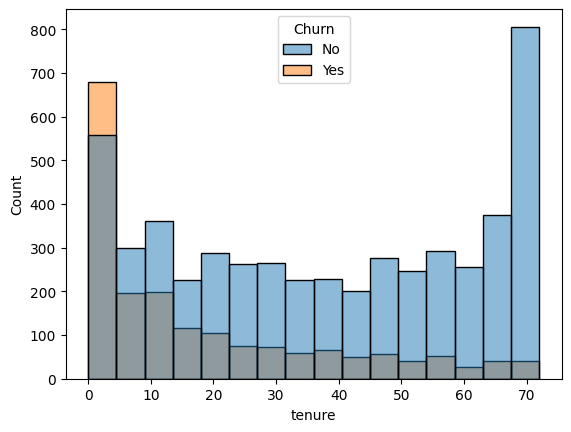

In [32]:
sns.histplot(data=data, x='tenure', hue='Churn')
plt.show()

# Handling Data inconsistancy

In [35]:
for column in data:
    if data[column].dtypes =='object':
        print(f'unique values{column} : {data[column].unique()}')
        print('  ')

unique valuesgender : ['Female' 'Male']
  
unique valuesPartner : ['Yes' 'No']
  
unique valuesDependents : ['No' 'Yes']
  
unique valuesPhoneService : ['No' 'Yes']
  
unique valuesMultipleLines : ['No phone service' 'No' 'Yes']
  
unique valuesInternetService : ['DSL' 'Fiber optic' 'No']
  
unique valuesOnlineSecurity : ['No' 'Yes' 'No internet service']
  
unique valuesOnlineBackup : ['Yes' 'No' 'No internet service']
  
unique valuesDeviceProtection : ['No' 'Yes' 'No internet service']
  
unique valuesTechSupport : ['No' 'Yes' 'No internet service']
  
unique valuesStreamingTV : ['No' 'Yes' 'No internet service']
  
unique valuesStreamingMovies : ['No' 'Yes' 'No internet service']
  
unique valuesContract : ['Month-to-month' 'One year' 'Two year']
  
unique valuesPaperlessBilling : ['Yes' 'No']
  
unique valuesPaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
  
unique valuesChurn : ['No' 'Yes']
  


In [36]:
data = data.replace({'No internet service':'No', 'No phone service':'No'})

In [41]:
for column in data:
    if data[column].dtypes =='object':
        print(f'unique values {column} : {data[column].unique()}')
        print('  ')

unique values gender : ['Female' 'Male']
  
unique values Partner : ['Yes' 'No']
  
unique values Dependents : ['No' 'Yes']
  
unique values PhoneService : ['No' 'Yes']
  
unique values MultipleLines : ['No' 'Yes']
  
unique values InternetService : ['DSL' 'Fiber optic' 'No']
  
unique values OnlineSecurity : ['No' 'Yes']
  
unique values OnlineBackup : ['Yes' 'No']
  
unique values DeviceProtection : ['No' 'Yes']
  
unique values TechSupport : ['No' 'Yes']
  
unique values StreamingTV : ['No' 'Yes']
  
unique values StreamingMovies : ['No' 'Yes']
  
unique values Contract : ['Month-to-month' 'One year' 'Two year']
  
unique values PaperlessBilling : ['Yes' 'No']
  
unique values PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
  
unique values Churn : ['No' 'Yes']
  


# Encoding

In [38]:
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [40]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
column_en =['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity','OnlineBackup',
            'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling', 'Churn']

In [65]:
ohe = OneHotEncoder(drop='first')
data[column_en]=ohe.fit_transform(data[column_en]).toarray().astype(int)

In [66]:
for column in data:
    if data[column].dtypes =='object':
        print(f'unique values {column} : {data[column].unique()}')
        print('  ')

In [67]:
le = LabelEncoder()
for cols in ['InternetService','Contract','PaymentMethod']:
    data[cols] =le.fit_transform(data[cols]).astype(int)

In [69]:
for column in data:
        print(f'unique values {column} : {data[column].unique()}')
        print('  ')

unique values gender : [0 1]
  
unique values SeniorCitizen : [0 1]
  
unique values Partner : [1 0]
  
unique values Dependents : [0 1]
  
unique values tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
  
unique values PhoneService : [0 1]
  
unique values MultipleLines : [0 1]
  
unique values InternetService : [0 1 2]
  
unique values OnlineSecurity : [0 1]
  
unique values OnlineBackup : [1 0]
  
unique values DeviceProtection : [0 1]
  
unique values TechSupport : [0 1]
  
unique values StreamingTV : [0 1]
  
unique values StreamingMovies : [0 1]
  
unique values Contract : [0 1 2]
  
unique values PaperlessBilling : [1 0]
  
unique values PaymentMethod : [2 3 0 1]
  
unique values MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
  
unique values TotalCharges : [  29.85 1889.5   108.15 ... 

# data scaling

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
ms = MinMaxScaler()
data[['tenure','MonthlyCharges','TotalCharges']] = ms.fit_transform(data[['tenure','MonthlyCharges','TotalCharges']])

In [73]:
data[['tenure','MonthlyCharges','TotalCharges']] 

,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330
...,...,...,...
7038,0.333333,0.662189,0.227521
7039,1.000000,0.845274,0.847461
7040,0.152778,0.112935,0.037809
7041,0.055556,0.558706,0.033210


# data splitting

In [74]:
x = data.iloc[:,:-1]
y =data['Churn']

In [118]:
ros = RandomOverSampler()
x,y = ros.fit_resample(x,y)

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [121]:
x_train.shape

(8278, 19)

In [122]:
x_test.shape

(2070, 19)

In [123]:
y.value_counts()

Churn
0    5174
1    5174
Name: count, dtype: int64

# Building ANN model

In [124]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
from keras.regularizers import L2

In [128]:
ann = Sequential()
    # Input layer
ann.add(Dense(16, input_shape=(19,), activation='relu',kernel_regularizer=L2(l2=0.01))),

#  Hidden layer
ann.add(BatchNormalization())
ann.add(Dense(10, activation='relu',kernel_regularizer=L2(l2=0.01))),

# output layer
ann.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train,y_train, batch_size=200, epochs=30, validation_data=(x_test,y_test),
          callbacks=EarlyStopping(monitor='val_loss',patience=5,restore_best_weights=True)) 

Epoch 1/30


C:\Users\gauri\OneDrive\Desktop\Deep_Learning\tfkenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7444 - loss: 0.5154 - val_accuracy: 0.7604 - val_loss: 0.4918
Epoch 2/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7522 - loss: 0.5098 - val_accuracy: 0.7686 - val_loss: 0.4894
Epoch 3/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7574 - loss: 0.5028 - val_accuracy: 0.7647 - val_loss: 0.4889
Epoch 4/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7602 - loss: 0.4944 - val_accuracy: 0.7671 - val_loss: 0.4864
Epoch 5/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7538 - loss: 0.5016 - val_accuracy: 0.7671 - val_loss: 0.4850
Epoch 6/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7565 - loss: 0.5040 - val_accuracy: 0.7681 - val_loss: 0.4838
Epoch 7/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7479 - loss: 0.5011 - val_accuracy: 0.7652 - val_loss: 0.4832
Epoch 8/30
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7628 - loss: 0.4912 - val_accuracy: 0.7671 - val_loss: 0.4815
Epo

In [129]:
model.evaluate(x_train,y_train)

259/259 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7684 - loss: 0.4767


[0.4756530523300171, 0.7718048095703125]

In [130]:
model.evaluate(x_test,y_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7906 - loss: 0.4578


[0.47110897302627563, 0.7763285040855408]

In [131]:
yp =ann.predict(x_test)

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [132]:
y_pred =[]
for i in yp:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
    

In [133]:
y_pred[:5]

[1, 1, 1, 0, 1]

In [134]:
y_test[:5]

9428    1
4593    0
5379    0
8918    1
6448    1
Name: Churn, dtype: int64

In [135]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [137]:
cm =confusion_matrix(y_test,y_pred)

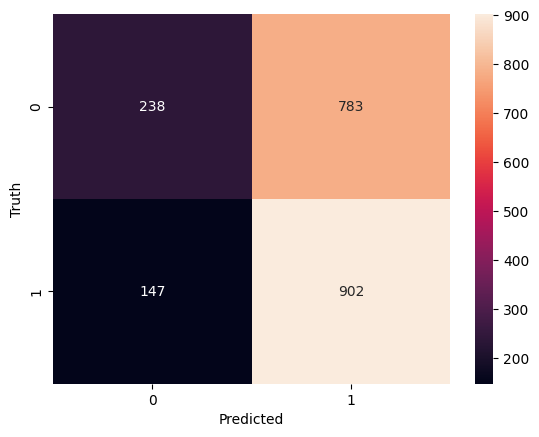

In [139]:
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [140]:
precision_score(y_test,y_pred)

0.5353115727002967

In [141]:
recall_score(y_test,y_pred)

0.8598665395614872

In [ ]:
1) build a deep learm=ning model to predict churn rate of bank
2) print confusion matrix, precision_score,recall_score and analyze prediction